## Curso de Big Data

## Trabajo Práctico 2 - Parte 1

### Grupo:  Armas Braithwaite, Fernández, Menta, Vargas Ochuza

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


## Enunciado
Entren a la página https://www.indec.gob.ar/ y vayan a la sección Servicios y Herramientas > Bases de datos. Descarguen la base de microdatos de la Encuesta Permanente de Hogares (EPH) correspondiente al primer trimestre de 2023 en formato xls (una vez descargada, la base a usar debería llamarse usu individual T123.xls). En la página web, también encontrará un diccionario de variables con el nombre de ”Diseño de registro y estructura para las bases preliminares (hogares y personas)”; este archivo les indica qué significa cada variable que aparece en la base de datos, en particular, en la sección de Diseño de registros de la base Personas.

In [3]:
# Importamos el módulo necesario para trabajar con la base de datos
import pandas as pd

In [4]:
# Seteamos el directorio donde vamos a trabajar (CAMBIAR)
import os
#os.chdir("C:/Users/mateo/Documents/UdeSA/Big_data/TP2")
os.chdir("C:/Users/Paula/Documents/BIGDATA/TPs_BigData/TP2")

In [5]:
# Importamos la base de datos
microdata = pd.read_excel("usu_individual_T123.xlsx ")

In [6]:
# Analizamos la columna aglomerados antes de filtrar por ella
microdata['AGLOMERADO']

0        91
1        91
2        91
3        91
4        91
         ..
48633    10
48634    10
48635    10
48636    10
48637    10
Name: AGLOMERADO, Length: 48638, dtype: int64

#### Ejercicio a
Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

In [7]:
# Del diccionario de variables sabemos que tenemos que quedarnos solamente con los valores 32 y 33
# que son los correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

# Filtramos el dataframe y lo renombramos
microdata_filtered = microdata[(microdata['AGLOMERADO'] == 32) | (microdata['AGLOMERADO'] == 33)]

# Observamos que aparece filtrada la columna "Aglomerado"
microdata_filtered['AGLOMERADO']

102      33
103      33
104      33
105      33
106      33
         ..
48597    33
48598    33
48599    33
48600    33
48601    33
Name: AGLOMERADO, Length: 7619, dtype: int64

#### Inciso b
Si hay observaciones con valores que no tienen sentido, descártenlas (ingresos y edades negativos, por ejemplo).


In [8]:
columnas_de_interes = ['CH04','CH07','CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']  

for col in columnas_de_interes:
    print(f"Valores únicos para {col}:")
    print(microdata[col].unique())

Valores únicos para CH04:
[1 2]
Valores únicos para CH07:
[5 4 1 2 3 9]
Valores únicos para CH08:
[ 1.  4.  3.  2. 12.  9. 13. 23. nan]
Valores únicos para NIVEL_ED:
[1 4 3 5 2 6 7]
Valores únicos para ESTADO:
[4 3 1 2 0]
Valores únicos para CAT_INAC:
[3 1 0 4 5 7 2 6]
Valores únicos para IPCF:
[ 79700. 180000. 145000. ...  31550.  23825. 262000.]


In [9]:
# Condiciones de filtrado
## Ingresos per cápita = 0


microdata_filtered = microdata_filtered[(microdata_filtered["IPCF"]>=0) & (microdata_filtered["CH06"]>=0) & (microdata_filtered["ESTADO"]!=0) & (microdata_filtered["CH07"]!=9) & (microdata_filtered["CH08"]!=9)]
len(microdata_filtered)

7519

#### Inciso c 
Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo.

In [10]:
import matplotlib.pyplot as plt

In [11]:
porcentaje_sexo = (microdata_filtered['CH04'].value_counts(normalize=True) * 100)
print(porcentaje_sexo)

2    52.068094
1    47.931906
Name: CH04, dtype: float64


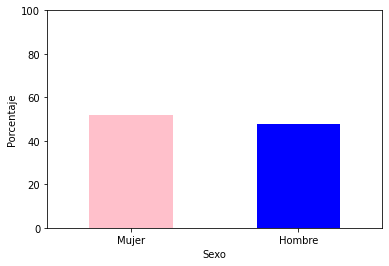

In [12]:
colores = {'1': 'blue', '2': 'pink'}
etiquetas = {1: 'Hombre', 2: 'Mujer'}

porcentaje_sexo.plot(kind='bar', color=[colores[key] for key in porcentaje_sexo.index.map(str)])
plt.title('')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje')
plt.xticks(ticks=range(len(etiquetas)), labels=[etiquetas[key] for key in porcentaje_sexo.index], rotation=0)
plt.ylim(0, 100)  # Esto establece los límites del eje y de 0% a 100%
plt.savefig("composicion_por_sexo.png", dpi=300, bbox_inches='tight')
plt.show()


#### Ejercicio d
Realicen una matriz de correlación con las siguientes variables: CH04, CH07, CH08, NIVEL ED, ESTADO, CAT INAC, IPCF. Comenten los resultados.

In [15]:
 !pip install heatmapz

In [16]:
from pylab import rcParams
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot  # Importa las bibliotecas necesarias

# Establece el tamaño de la figura
rcParams['figure.figsize'] = 7, 7

# Configura los estilos de seaborn
sns.set(color_codes=True, font_scale=1.2)

# Configuración para mostrar gráficos en línea
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

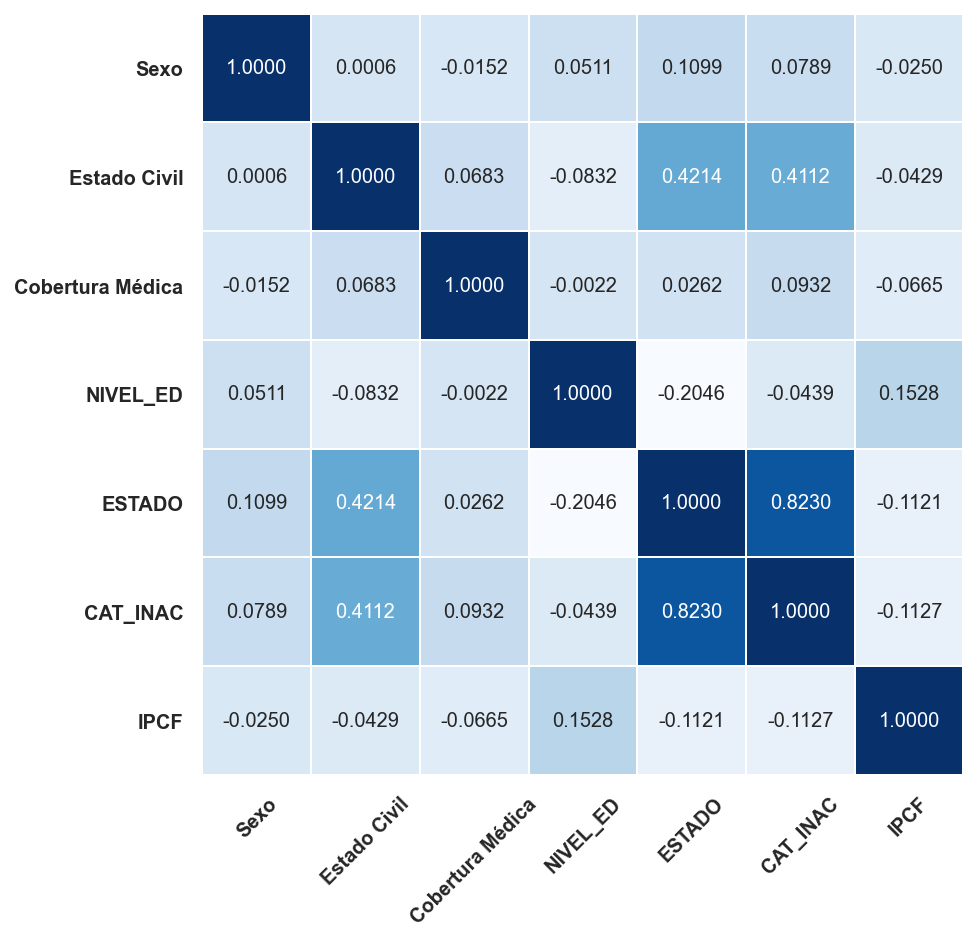

In [17]:
# Selecciona las columnas de interés
cols_of_interest = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
subset_data = microdata_filtered[cols_of_interest]

# Calcula la matriz de correlación
corr_matrix = subset_data.corr()

# Obtiene las etiquetas actuales
current_labels = list(corr_matrix.columns)

# Sustituye las que quieres cambiar
for index, label in enumerate(current_labels):
    if label == 'CH04':
        current_labels[index] = 'Sexo'
    elif label == 'CH07':
        current_labels[index] = 'Estado Civil'
    elif label == 'CH08':
        current_labels[index] = 'Cobertura Médica'

# Genera el heatmap
plt.figure(figsize=(7, 7))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap='Blues', square=True, cbar=False, linewidths=0.5)

# Modifica las etiquetas para que muestren las descripciones
heatmap.set_xticklabels(current_labels, rotation=45)
heatmap.set_yticklabels(current_labels, rotation=0)
# Achica el texto dentro de los cuadros
heatmap.tick_params(axis='both', which='both', labelsize=8)

# Añade negrita y aumenta el tamaño de las etiquetas en los ejes
for tick in heatmap.get_xticklabels():
    tick.set_fontweight("bold")
    tick.set_fontsize(10)
for tick in heatmap.get_yticklabels():
    tick.set_fontweight("bold")
    tick.set_fontsize(10)

plt.savefig("Matriz_correlacion.png", dpi=300, bbox_inches='tight')    

plt.show()



#### Inciso e
¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [18]:
# Obteniendo el conteo de valores para la columna 'ESTADO'
counts = microdata_filtered['ESTADO'].value_counts()

# Obteniendo el conteo específico para los valores 2 y 3
desocupados_count = counts.get(2, 0)  # El '0' es un valor por defecto en caso de que no haya ningún '2'
inactivos_count = counts.get(3, 0)  # El '0' es un valor por defecto en caso de que no haya ningún '3'

# Printeando el resultado
print(f"Hay {desocupados_count} desocupados y {inactivos_count} inactivos.")


Hay 286 desocupados y 2826 inactivos.


In [19]:
# Agrupando por 'ESTADO' y obteniendo la media de 'IPCF'
means = microdata_filtered.groupby('ESTADO')['IPCF'].mean()

# Creando un DataFrame para presentar los resultados de manera tabulada
result = pd.DataFrame({
    'ESTADO': ['Ocupado', 'Desocupado', 'Inactivo'],
    'Media IPCF': [means.get(1, np.nan), means.get(2, np.nan), means.get(3, np.nan)]  # Usando np.nan como valor por defecto en caso de que no haya algún estado
})

print(result)

       ESTADO    Media IPCF
0     Ocupado  59812.340288
1  Desocupado  25536.022203
2    Inactivo  40089.138287


#### Inciso f 


In [23]:
microdata2 = pd.read_excel("tabla_adulto_equiv.xlsx ", skiprows=3, nrows=25)

In [24]:
microdata2 = microdata2.drop(0)
# Filtrar las filas y columnas deseadas
microdata2 = microdata2.loc[:23, ["Edad", "Mujeres", "Varones"]]
print(microdata2)


              Edad  Mujeres  Varones
1   Menor de 1 año     0.35     0.35
2             1año     0.37     0.37
3           2 años     0.46     0.46
4           3 años     0.51     0.51
5           4 años     0.55     0.55
6           5 años     0.60     0.60
7           6 años     0.64     0.64
8           7 años     0.66     0.66
9           8 años     0.68     0.68
10          9 años     0.69     0.69
11         10 años     0.70     0.79
12         11 años     0.72     0.82
13         12 años     0.74     0.85
14         13 años     0.76     0.90
15         14 años     0.76     0.96
16         15 años     0.77     1.00
17         16 años     0.77     1.03
18         17 años     0.77     1.04
19    18 a 29 años     0.76     1.02
20    30 a 45 años     0.77     1.00
21    46 a 60 años     0.76     1.00
22    61 a 75 años     0.67     0.83
23  más de 75 años     0.63     0.74


In [25]:
microdata2_new = pd.DataFrame(columns=['Edad', 'Mujeres', 'Varones'])

for index, row in microdata2.iterrows():
    if 'Menor de 1 año' in row['Edad']:
        age_range = [0, 0]
    elif 'más de 75 años' in row['Edad']:
        age_range = [76, 150]  # Suponiendo un valor máximo razonable para la edad
    elif 'año' in row['Edad'] and ' a ' not in row['Edad']:
        age_val = row['Edad'].split(' ')[0].replace('año', '').strip()  # Limpiar la cadena
        age_range = [int(age_val), int(age_val)]
    else:
        # Limpieza adicional para quitar ' años' de cada número
        age_range = [int(i.replace('años', '').strip()) for i in row['Edad'].split(' a ')]
    
    for age in range(age_range[0], age_range[1] + 1):
        row_to_append = pd.DataFrame({'Edad': [age], 'Mujeres': [row['Mujeres']], 'Varones': [row['Varones']]})
        microdata2_new = pd.concat([microdata2_new, row_to_append], ignore_index=True)


In [26]:
print(microdata2_new)

    Edad  Mujeres  Varones
0      0     0.35     0.35
1      1     0.37     0.37
2      2     0.46     0.46
3      3     0.51     0.51
4      4     0.55     0.55
..   ...      ...      ...
146  146     0.63     0.74
147  147     0.63     0.74
148  148     0.63     0.74
149  149     0.63     0.74
150  150     0.63     0.74

[151 rows x 3 columns]


In [27]:
# Creamos dos columnas auxiliares para el matching basado en el sexo
microdata2_new['Varones_match'] = 1
microdata2_new['Mujeres_match'] = 2

# Realizamos el merge
merged_df = pd.merge(microdata_filtered, microdata2_new, 
                     left_on=['CH06', 'CH04'], 
                     right_on=['Edad', 'Varones_match'], 
                     how='left')

# Para aquellos que no coincidieron con 'Varones', intentamos con 'Mujeres'
merged_df2 = pd.merge(microdata_filtered, microdata2_new, 
                     left_on=['CH06', 'CH04'], 
                     right_on=['Edad', 'Mujeres_match'], 
                     how='left')

# Creamos la columna 'adulto_equiv' basada en las coincidencias
merged_df['adulto_equiv'] = merged_df['Varones'].fillna(merged_df2['Mujeres'])

# Eliminamos las columnas auxiliares y las columnas extra de 'Varones' y 'Mujeres'
merged_df.drop(columns=['Varones_match', 'Mujeres_match', 'Varones', 'Mujeres', 'Edad'], inplace=True)

# Reemplaza tu dataframe original con el dataframe fusionado
microdata_filtered = merged_df

In [28]:
microdata_filtered['adulto_equiv']

0       0.67
1       0.83
2       1.00
3       0.76
4       0.69
        ... 
7514    0.63
7515    0.77
7516    1.04
7517    1.02
7518    1.00
Name: adulto_equiv, Length: 7519, dtype: float64

In [29]:
# Seguimos con el mismo df ya definido
microdata_filtered_agg = microdata_filtered.groupby(by=["CODUSU"]).agg({"adulto_equiv":"sum"})

microdata_filtered_agg.rename(columns={'adulto_equiv': 'ad_equiv'}, inplace=True)

microdata_filtered_agg.reset_index(inplace=True)
# Si observan el resultado verán que las variables de agrupamiento pasan a definir el índice
microdata_filtered_agg

,CODUSU,ad_equiv
0,TQRMNOPPQHJNOPCDEIJAH00802435,3.54
1,TQRMNOPPQHKMQRCDEIJAH00780809,4.48
2,TQRMNOPPQHLNKTCDEIIAD00780107,2.14
3,TQRMNOPPQHLOKTCDEIJAH00719666,1.00
4,TQRMNOPPQHMKLSCDEIIAD00801791,1.41
...,...,...
2715,TQTMNORTQHLMNUCDEIJAH00793701,3.58
2716,TQTMNORTYHJOPMCDEIJAH00794674,1.78
2717,TQUMNOQQUHKNRUCDEIJAH00780938,3.07
2718,TQUMNOQTRHKMPSCDEIJAH00801913,2.17


In [30]:
# Realizamos el left join
merged_df = pd.merge(microdata_filtered, microdata_filtered_agg[['CODUSU', 'ad_equiv']], 
                     on='CODUSU', 
                     how='left')

# Renombramos la columna 'adulto_equiv' a 'ad_equiv_hogar'
merged_df.rename(columns={'ad_equiv': 'ad_equiv_hogar'}, inplace=True)

# Reemplaza tu dataframe original con el dataframe fusionado
microdata_filtered = merged_df

In [31]:
microdata_filtered['ad_equiv_hogar']

0       1.50
1       1.50
2       2.45
3       2.45
4       2.45
        ... 
7514    0.63
7515    2.83
7516    2.83
7517    2.83
7518    5.37
Name: ad_equiv_hogar, Length: 7519, dtype: float64

#### Ejercicio 3
Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su ingreso total familiar (ITF)? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su ITF. Las observaciones con ITF = 0 guárdenlas en una base bajo el nombre norespondieron.

In [32]:
respondieron = microdata_filtered[(microdata_filtered['ITF'] > 0)]
norespondieron = microdata_filtered[(microdata_filtered['ITF'] == 0)]

print(len(respondieron))
print(len(norespondieron))

4173
3346


#### Ejercicio 4
Sabiendo que la Canasta Básica Total para un adulto equivalente en el Gran Buenos Aires en el primer trimestre de 2023 es aproximadamente $57.371,05, agreguen a la base respondieron una columna llamada ingreso_necesario que sea el producto de este valor por ad_equiv_hogar. Note que este es el valor mínimo que necesita ese hogar para no ser pobre.

In [33]:
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05

<ipython-input-33-15375a50c8c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05


#### Ejercicio 9
Por último, agreguen a respondieron una columna llamada pobre que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario. ¿Cuántos pobres identificaron?

In [34]:
respondieron['pobre'] = np.where(respondieron['ITF'] < respondieron['ingreso_necesario'], 1, 0)

# Calcula el número de pobres
numero_pobres = respondieron['pobre'].sum()

# Calcula la proporción de pobres
proporcion_pobres = numero_pobres / len(respondieron)

print(f"Número de pobres: {numero_pobres}")
print(f"Proporción de pobres: {proporcion_pobres:.2%}")


Número de pobres: 1572
Proporción de pobres: 37.67%


<ipython-input-34-a5dc41dd6c54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = np.where(respondieron['ITF'] < respondieron['ingreso_necesario'], 1, 0)


## Parte 2 

Eliminen de ambas bases todas las variables relacionadas a ingresos (en el archivo codigos eph.pdf ver las categorías: ingresos de la ocupación principal de los asalariados, ingresos de la ocupación principal, ingresos de otras ocupaciones, ingreso total individual, ingresos no laborales, ingreso total familiar, ingreso per cápita familiar). Elimine también las columnas adulto equiv, ad_equiv_hogar e ingreso_necesario.

In [35]:
# Vemos un resumen completo del dataframe
respondieron.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4173 entries, 0 to 7514
Data columns (total 181 columns):
 #    Column             Dtype  
---   ------             -----  
 0    CODUSU             object 
 1    ANO4               int64  
 2    TRIMESTRE          int64  
 3    NRO_HOGAR          int64  
 4    COMPONENTE         int64  
 5    H15                int64  
 6    REGION             int64  
 7    MAS_500            object 
 8    AGLOMERADO         int64  
 9    PONDERA            int64  
 10   CH03               int64  
 11   CH04               int64  
 12   CH05               object 
 13   CH06               object 
 14   CH07               int64  
 15   CH08               float64
 16   CH09               int64  
 17   CH10               int64  
 18   CH11               int64  
 19   CH12               int64  
 20   CH13               int64  
 21   CH14               float64
 22   CH15               int64  
 23   CH15_COD           float64
 24   CH16               int64  
 

Inciso 1

In [36]:
# Eliminar columnas específicas
respondieron_new = respondieron.drop(columns=['CODUSU', 'MAS_500', 'CH05', 'CH15_COD', 'CH16_COD', 'IMPUTA','CH14'])

# Eliminar un rango de columnas
start = respondieron_new.columns.get_loc('PP03C')
end = respondieron_new.columns.get_loc('ingreso_necesario')

columns_to_drop = respondieron_new.columns[start:end+1]
respondieron_new = respondieron_new.drop(columns=columns_to_drop)

In [37]:
# Eliminar columnas específicas
norespondieron_new = norespondieron.drop(columns=['CODUSU', 'MAS_500', 'CH05', 'CH15_COD', 'CH16_COD', 'IMPUTA','CH14'])

# Eliminar un rango de columnas
start = norespondieron_new.columns.get_loc('PP03C')
end = norespondieron_new.columns.get_loc('ad_equiv_hogar')

columns_to_drop = norespondieron_new.columns[start:end+1]
norespondieron_new = norespondieron_new.drop(columns=columns_to_drop)

In [38]:
respondieron_new['CH06'] = pd.to_numeric(respondieron_new['CH06'])
norespondieron_new['CH06'] = pd.to_numeric(norespondieron_new['CH06'])

Inciso 2

Partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) utilizando el comando train test split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 201. Establezca a pobre como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las
variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
import statsmodels.api as sm
log_reg = LogisticRegression(max_iter=5000)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# Primero agregamos la columna de 1s y hacemos el ajuste
respondieron_new = sm.add_constant(respondieron_new) 
norespondieron_new = sm.add_constant(norespondieron_new) 
# Entrenaremos con el 70% de la base de datos y el resto se usarán para testear 
# el modelo obtenido
respondieron_new_train, respondieron_new_test, pobre_train, pobre_test = train_test_split(respondieron_new.iloc[:, :-1], respondieron_new["pobre"], test_size=0.3, random_state=201)

## Logit

In [41]:
# Estimo:
# Ajustamos el clasificador con el metodo fit() 
log_reg = LogisticRegression().fit(respondieron_new_train, pobre_train)
pobre_test_pred_score = log_reg.predict_proba(respondieron_new_test)[:,1]
#pobre_test_pred = log_reg.predict(respondieron_new_test)

C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC

In [42]:
# AUC y ROC
#auc = roc_auc_score(pobre_test, pobre_test_pred_score)
auc = roc_auc_score(pobre_test, pobre_test_pred_score)
print('AUC: %.4f' % auc)
fpr, tpr, thresholds = roc_curve(pobre_test, pobre_test_pred_score)

AUC: 0.7810


ROC Curve

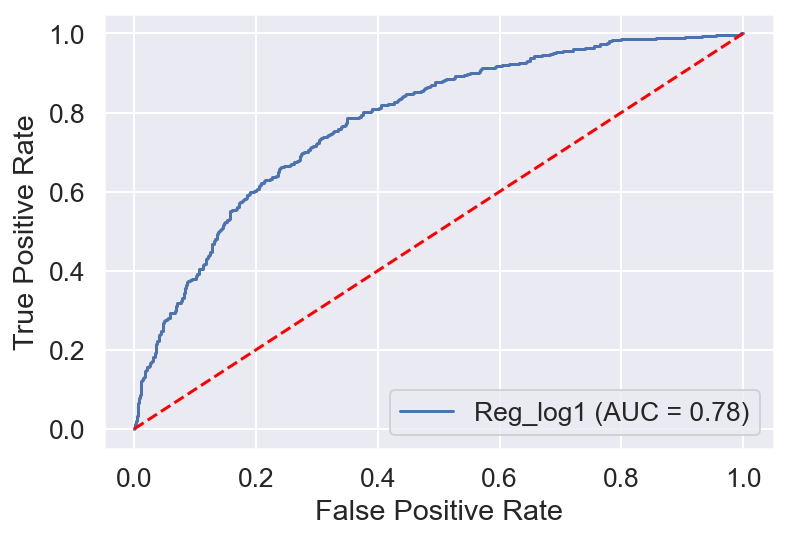

In [43]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log1')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

Matriz de confusión y Accuracy Rate

In [45]:
pobre_test_pred=0

In [46]:
# Clasificador de Bayes
pobre_test_pred=np.where(pobre_test_pred_score > 0.5, 1, pobre_test_pred)
pobre_test_pred=np.where(pobre_test_pred_score <=0.5, 0, pobre_test_pred)

In [47]:
print(pobre_test_pred)

[0 0 0 ... 0 1 0]


In [48]:
conf_mat = confusion_matrix(pobre_test, pobre_test_pred) 

print('Confusion Matrix:\n', conf_mat) 
print('Accuracy Score:',accuracy_score(pobre_test, pobre_test_pred)) # Cantidad de (vp+vn) sobre total
# Acá, la matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos

Confusion Matrix:
 [[642 134]
 [204 272]]
Accuracy Score: 0.7300319488817891


## ADL

In [49]:
lda = LDA()
lda.fit(respondieron_new_train, pobre_train)
resultslda = lda.predict(respondieron_new_test)
pobre_pred_lda = pd.Series(resultslda.tolist())

conf_mat2 = confusion_matrix(pobre_test, pobre_pred_lda)
print('Confusion Matrix:\n', conf_mat2)
print('Accuracy Score:',accuracy_score(pobre_test, pobre_pred_lda))

Confusion Matrix:
 [[641 135]
 [202 274]]
Accuracy Score: 0.7308306709265175


In [50]:
auc_lda = roc_auc_score(pobre_test, pobre_pred_lda)
print('AUC: %.2f' % auc_lda)
fpr, tpr, thresholds = roc_curve(pobre_test, pobre_pred_lda)

AUC: 0.70


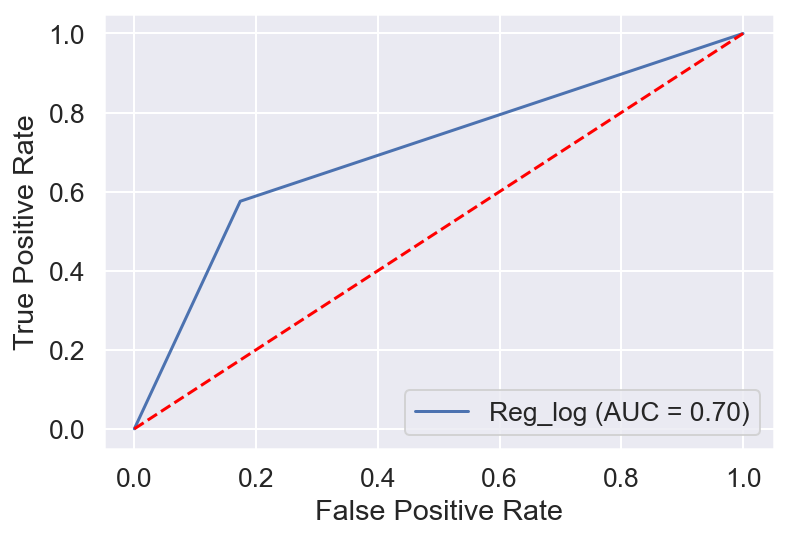

In [51]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_lda, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

## KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(respondieron_new_train, pobre_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
pobre_test_pred_knn = knn.predict(respondieron_new_test)
accuracy_knn = accuracy_score(pobre_test, pobre_test_pred_knn)
print("La precisión del modelo es: %.3f" %accuracy_knn)
conf_mat3 = confusion_matrix(pobre_test, pobre_test_pred_knn)
print('Confusion Matrix:\n', conf_mat3)

La precisión del modelo es: 0.711
Confusion Matrix:
 [[607 169]
 [193 283]]


In [54]:
auc_knn = roc_auc_score(pobre_test, pobre_test_pred_knn)
print('AUC: %.2f' % auc_knn)
fpr, tpr, thresholds = roc_curve(pobre_test, pobre_test_pred_knn)

AUC: 0.69


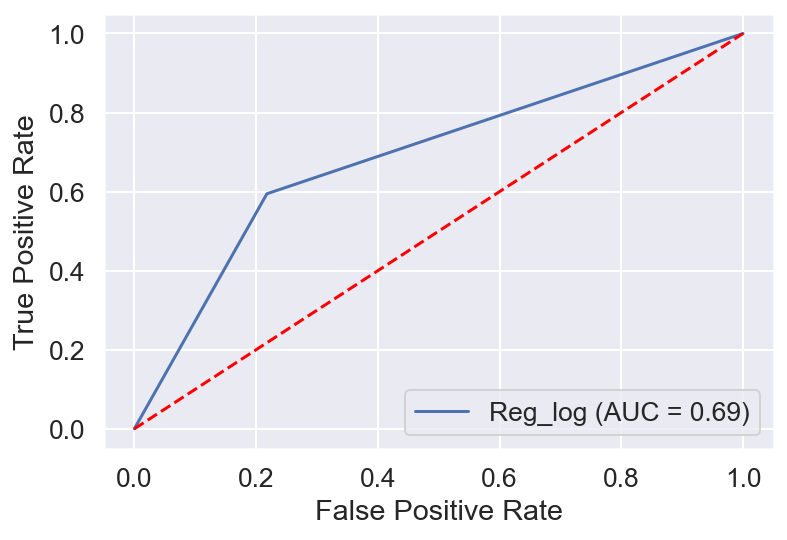

In [55]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_knn, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

Inciso 5

In [56]:
pobre_test_pred = log_reg.predict(norespondieron_new)
pobre_test_pred=np.where(pobre_test_pred > 0.5, 1, pobre_test_pred)
pobre_test_pred=np.where(pobre_test_pred<=0.5, 0, pobre_test_pred)
norespondieron_new['pobre_predicted'] = pobre_test_pred

In [57]:
print(norespondieron_new)

      ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  REGION  AGLOMERADO  \
7     2023          1          1           1    1       1          33   
8     2023          1          1           2    1       1          33   
9     2023          1          1           3    1       1          33   
11    2023          1          1           1    1       1          32   
12    2023          1          1           2    1       1          32   
...    ...        ...        ...         ...  ...     ...         ...   
7501  2023          1          1           4    1       1          33   
7515  2023          1          1           1    1       1          33   
7516  2023          1          1           2    1       1          33   
7517  2023          1          1           3    1       1          33   
7518  2023          1          1           1    1       1          33   

      PONDERA  CH03  CH04  ...  PP02C3  PP02C4  PP02C5  PP02C6  PP02C7  \
7        2086     1     1  ...       0       0   

In [58]:
cantidad_pobres_norespondieron_new = norespondieron_new['pobre_predicted'].sum()
cantidad_norespondieron_new = norespondieron_new['pobre_predicted'].count()
print(f"Cantidad de pobres predichos en norespondieron: {cantidad_pobres_norespondieron_new}")
print(f"Proporción de pobres predichos en norespondieron: {cantidad_pobres_norespondieron_new/cantidad_norespondieron_new}")

Cantidad de pobres predichos en norespondieron: 1062
Proporción de pobres predichos en norespondieron: 0.31739390316796173


ACÁ LO DEJO POR SI CORRIJEN ALGO Y HAY QUE HACERLO CON EL OTRO MÉTODO

In [59]:
# norespondieron_new = norespondieron_new.drop('pobre', axis=1)
pobre_predictions_norespondieron = knn.predict(norespondieron_new)
norespondieron_new['pobre_predicted'] = pobre_predictions_norespondieron
# Cantidad y proporción de pobres predichos en norespondieron
cantidad_pobres_norespondieron_new = norespondieron_new['pobre_predicted'].sum()
cantidad_norespondieron_new = norespondieron_new['const'].sum()
print(f"Cantidad de pobres predichos en norespondieron: {cantidad_pobres_norespondieron_new/cantidad_norespondieron_new}")
print(f"Proporción de pobres predichos en norespondieron: {cantidad_pobres_norespondieron_new/cantidad_norespondieron_new}")

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 36 while Y.shape[1] == 35

In [60]:
cantidad_pobres_norespondieron_new = norespondieron_new['pobre_predicted'].sum()
cantidad_norespondieron_new = norespondieron_new['const'].sum()
print(f"Cantidad de pobres predichos en norespondieron: {cantidad_pobres_norespondieron_new}")
print(f"Proporción de pobres predichos en norespondieron: {cantidad_pobres_norespondieron_new/cantidad_norespondieron_new}")

KeyError: 'const'

Inciso 6

In [61]:
# eliminamos variables que creemos que no nos van a aportar datos para hacer el modelo predictivo
# eliminamos imputa: tiene muchos missings
# CH14 lo eliminamos porque tiene muchos missings y si pierdo la mitad de las variables

respondieron_new2 = respondieron.loc[:, "CH03":"CAT_INAC"]
respondieron_new2["pobre"] = respondieron["pobre"]
respondieron_new2 = respondieron_new2.drop(['CH05','CH12', 'CH13','CH14', 'CH15', 'CH15_COD', 'CH16_COD'], axis=1)
respondieron_new2 = respondieron_new2[(respondieron_new2["CH16"]!=0) & (respondieron_new2["CH16"]!=9)]


In [62]:
# Primero agregamos la columna de 1s y hacemos el ajuste
respondieron_new2 = sm.add_constant(respondieron_new2) 
# Entrenaremos con el 70% de la base de datos y el resto se usarán para testear 
# el modelo obtenido
respondieron_new2_train, respondieron_new2_test, pobre2_train, pobre2_test = train_test_split(respondieron_new2.iloc[:, :-1], respondieron_new2["pobre"], test_size=0.3, random_state=201)

In [63]:
# Estimo:
# Ajustamos el clasificador con el metodo fit() 
log_reg2 = LogisticRegression().fit(respondieron_new2_train, pobre2_train)
pobre_test2_pred_score = log_reg2.predict_proba(respondieron_new2_test)[:,1]

C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
# AUC y ROC
#auc = roc_auc_score(pobre_test, pobre_test_pred_score)
auc2 = roc_auc_score(pobre2_test, pobre_test2_pred_score)
print('AUC: %.4f' % auc2)
fpr2, tpr2, thresholds2 = roc_curve(pobre2_test, pobre_test2_pred_score)

AUC: 0.7817


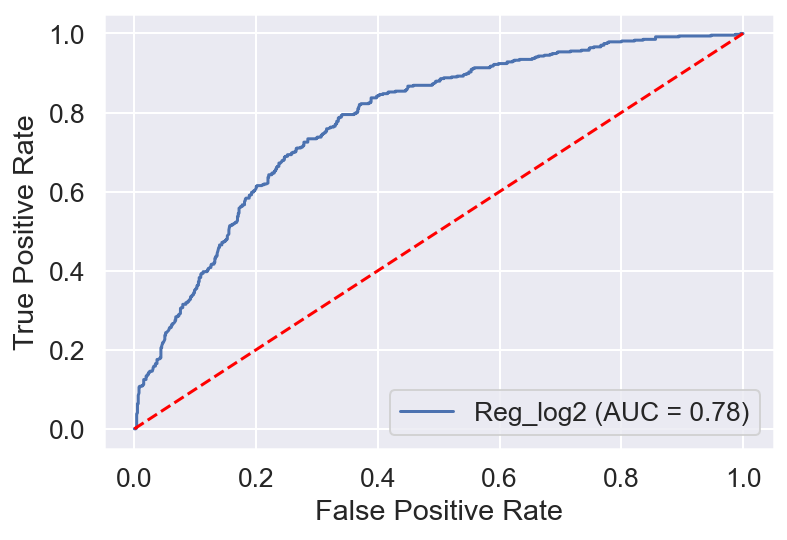

In [65]:
display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=auc2, estimator_name='Reg_log2')
display2.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [66]:
# Clasificador de Bayes
pobre2_test_pred=0
pobre2_test_pred=np.where(pobre_test2_pred_score > 0.5, 1, pobre2_test_pred)
pobre2_test_pred=np.where(pobre_test2_pred_score<=0.5, 0, pobre2_test_pred)

In [67]:
print(pobre2_test_pred)

[0 0 0 ... 0 0 0]


In [68]:
conf_mat2 = confusion_matrix(pobre2_test, pobre2_test_pred)
print('Confusion Matrix:\n', conf_mat2) 
print('Accuracy Score:', accuracy_score(pobre2_test, pobre2_test_pred))


Confusion Matrix:
 [[653 126]
 [229 244]]
Accuracy Score: 0.7164536741214057
